In [1]:
#importando a biblioteca
import pandas as pd

In [3]:
#Leitura dos arquivos
df1 = pd.read_excel('/content/drive/MyDrive/DioPD/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/DioPD/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/DioPD/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/DioPD/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/DioPD/datasets/Salvador.xlsx')

In [4]:
#Juntando  todos arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [5]:
#exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [13]:
#exibindo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [12]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
47,Natal,2018-03-13,521.00,854,3
188,Salvador,2019-01-02,178.11,1035,3
86,Natal,2019-01-02,156.47,1037,3
36,Salvador,2019-01-01,9.67,1037,1
119,Recife,2019-03-02,152.30,982,7


In [8]:
#Verificando o topo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
#Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [14]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [15]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [16]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
#substituindo os valores nulos pela media
df['Vendas'].fillna(df['Vendas'].mean(), inplace = True)

In [18]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [19]:
#substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace = True)

In [20]:
#apagando as linhas com valores nulos
df.dropna(inplace = True)

In [21]:
#apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset = ['Vendas'], inplace = True)

In [22]:
#removendo linhas que estejam com valores faltantes em todas as colunas 
df.dropna(how = 'all', inplace = True)

# **Criando colunas novas**

In [25]:
#Criando a coluna receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [26]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [27]:
df['Receita/vendas'] = df['Receita'] / df['Vendas']

In [28]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [29]:
#retornado a maior receita
df['Receita'].max()

3544.0

In [30]:
#retornando a menor receita
df['Receita'].min()

3.34

In [33]:
#nlargest
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [35]:
#nsamllest
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [34]:
#Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [37]:
#ordenando conjunto de dados
df.sort_values('Receita', ascending = False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


## **Trabalhando com dados**


In [38]:
#transformando a coluna de data em tipo int
df['Data'] = df['Data'].astype('int64')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [42]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/vendas    float64
dtype: object

In [44]:
#transformando a coluna data em data
df['Data'] = pd.to_datetime(df['Data'])

In [45]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/vendas           float64
dtype: object

In [48]:
#agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [49]:
#criando uma nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year

In [50]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda
114,Natal,2019-01-02,25.52,1034,1,25.52,1.0,2019
60,Natal,2018-05-02,534.00,852,3,1602.00,3.0,2018
107,Aracaju,2018-01-01,142.57,1523,3,427.71,3.0,2018
140,Fortaleza,2019-03-02,166.89,983,5,834.45,5.0,2019
155,Natal,2019-01-02,237.81,1036,3,713.43,3.0,2019


In [54]:
#extraindo o mes e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [55]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,mes_venda,dia_venda
122,Recife,2019-03-02,235.06,983,3,705.18,3.0,2019,3,2
182,Natal,2019-01-02,6.60,1037,2,13.20,2.0,2019,1,2
201,Salvador,2019-01-02,86.61,1036,1,86.61,1.0,2019,1,2
115,Salvador,2019-03-02,202.33,1035,2,404.66,2.0,2019,3,2
112,Salvador,2019-03-02,43.00,1036,3,129.00,3.0,2019,3,2


In [56]:
#retornado a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [57]:
#calculando a diferenca de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [58]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
154,Natal,2019-01-02,9.58,1037,1,9.58,1.0,2019,1,2,366 days
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days
132,Fortaleza,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days
22,Recife,2019-01-01,39.53,983,3,118.59,3.0,2019,1,1,365 days
88,Aracaju,2018-01-01,190.67,1521,5,953.35,5.0,2018,1,1,0 days


In [66]:
#criando a coluna trimestre
df['trimestre_venda'] = df['Data'].dt.quarter

In [67]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semetre_venda,trimestre_venda
61,Recife,2019-01-01,127.85,982,7,894.95,7.0,2019,1,1,365 days,1,1
8,Fortaleza,2019-02-11,37.49,1005,1,37.49,1.0,2019,2,11,406 days,1,1
58,Salvador,2019-01-01,20.64,1037,2,41.28,2.0,2019,1,1,365 days,1,1
195,Natal,2019-01-02,44.89,1036,3,134.67,3.0,2019,1,2,366 days,1,1
47,Salvador,2019-01-01,190.03,1036,2,380.06,2.0,2019,1,1,365 days,1,1


In [68]:
#filtrando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)] 

In [69]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semetre_venda,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1,1


## **Visualização de dados**

In [70]:
df['LojaID'].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

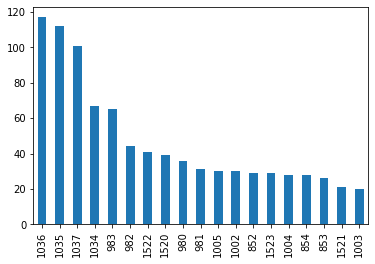

In [71]:
#grafico de barras
df['LojaID'].value_counts(ascending = False).plot.bar();  

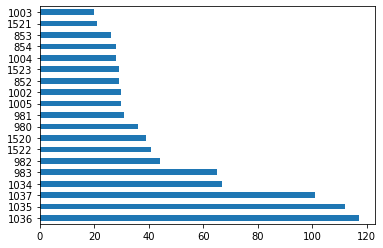

In [72]:
#grafico de barras horizontais
df['LojaID'].value_counts().plot.barh();

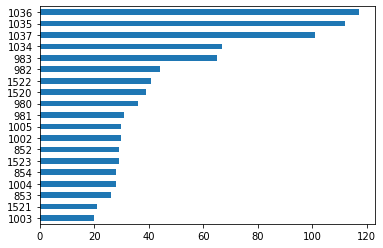

In [76]:
#grafico de barras horizontais
df['LojaID'].value_counts(ascending = True).plot.barh();

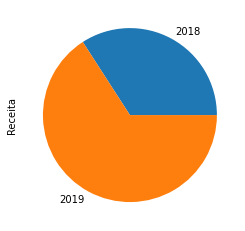

In [74]:
#grafico pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [75]:
#toltal vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

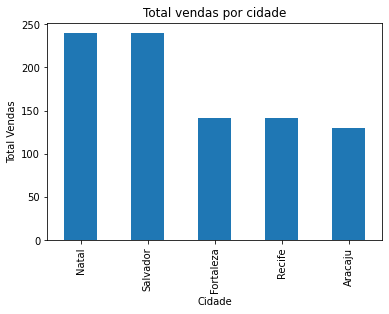

In [77]:
#adicionado um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = 'Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

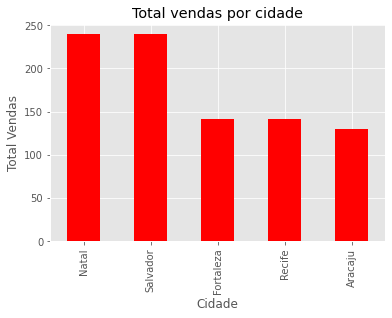

In [80]:
#alterando cor
df['Cidade'].value_counts().plot.bar(title = 'Total vendas por cidade', color = 'red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [79]:
#alterando estilo
plt.style.use('ggplot')

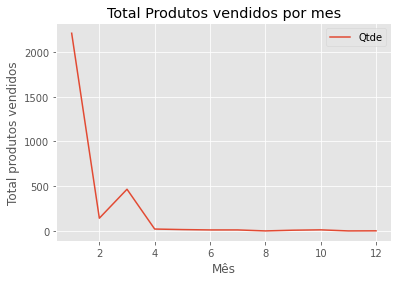

In [83]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total Produtos vendidos por mes')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();

In [84]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [85]:
#selecionado apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

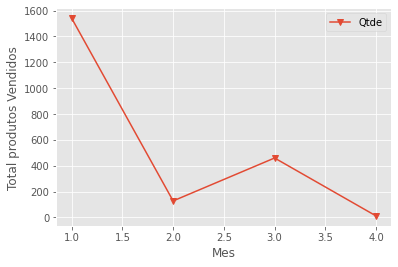

In [87]:
#total produtos vendidos por mes
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel('Mes')
plt.ylabel('Total produtos Vendidos')
plt.legend()

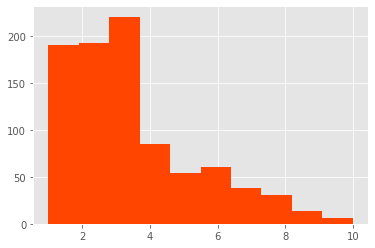

In [94]:
#hisograma
plt.hist(df['Qtde'], color = 'orangered');

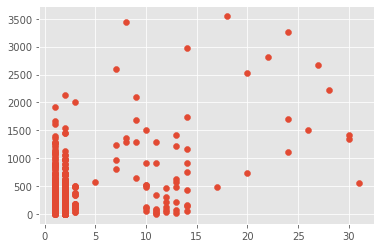

In [89]:
plt.scatter(x=df_2019['dia_venda'], y = df_2019['Receita']);

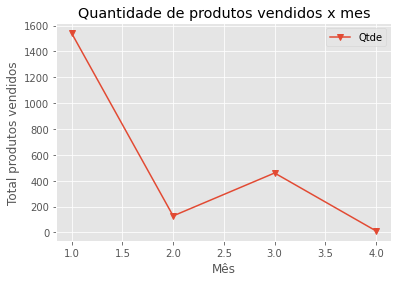

In [95]:
#salvando png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v');
plt.title('Quantidade de produtos vendidos x mes')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend()
plt.savefig('Grafico QTDE x MÊS.png')